In [43]:
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import re
import matplotlib
from src.utils import get_auc, get_empirical_cdf, get_all, _process_evalharness_results, get_superglue_results
import pandas as pd
import seaborn as sns

from src.figure_plotting_utils import *

In [44]:
plt.rcParams.update({
    # Fonts (increased further for visibility)
    'font.size': 28,                      # Default font size
    'font.family': 'serif',               # Set font family to 'serif'
    'font.serif': ['Times New Roman', 'DejaVu Math TeX Gyre', 'DejaVu Serif'],  # Serif fonts
    'axes.titlesize': 30,                 # Title font size (even larger)
    'axes.labelsize': 30,                 # Axis label font size
    'legend.fontsize': 26,                # Legend font size
    'xtick.labelsize': 24,                # X-tick label font size
    'ytick.labelsize': 24,                # Y-tick label font size
    
    # Figure size and DPI
    'figure.figsize': [10, 8],            # Same figure size, but adjust as needed
    'figure.dpi': 100,                    # Higher resolution for clarity
    
    # Line properties
    'lines.linewidth': 4,                 # Default line thickness
    'lines.markersize': 15,               # Marker size
    
    # Axes
    'axes.grid': True,                    # Grid on
    'grid.color': 'gray',                 # Grid color
    'grid.linestyle': '-',                # Solid grid line style
    'grid.linewidth': 0.75,               # Grid line width
    'axes.edgecolor': 'black',            # Axes border color
    'axes.linewidth': 1.5,                # Thicker axes border
    'axes.titleweight': 'bold',           # Bold titles
    
    # Set default x-axis to start at 0
    'axes.autolimit_mode': 'round_numbers',  # Round axis limits
    'axes.xmargin': 0.0,                    # Remove extra margin on x-axis
    'axes.ymargin': 0.05,                 # Slight y-axis margin
    
    # Ticks
    'xtick.major.size': 7,                # Major tick size
    'xtick.major.width': 1.5,             # Major tick width
    'ytick.major.size': 7,                # Major tick size
    'ytick.major.width': 1.5,             # Major tick width
    
    # Legend
    'legend.frameon': True,               # Frame around legend
    'legend.framealpha': 0.9,             # Slightly transparent frame
    'legend.fancybox': True,              # Rounded corners
    
    # Save figure
    'savefig.dpi': 300,                   # High resolution for saving
    'savefig.format': 'png',              # Save format
    'savefig.bbox': 'tight',              # Tight layout for saving
})
default_cycler = plt.rcParams['axes.prop_cycle']
default_cycler = [c['color'] for c in default_cycler]

In [45]:
TASKS = {
        'boolq':'acc',
        'cb':'acc',
        'copa':'acc',
        'multirc':'acc',
        'record': 'f1',
        'rte':'acc',
        'wic':'acc',
        'wsc':'acc',
        'gsm8k_cot_self_consistency': 'exact_match,flexible-extract'
    }

In [46]:
amlt_parent = '/home/blockadam/gaussian-watermarking/amlt'
figs_parent = '/home/blockadam/gaussian-watermarking/figs/low_rank_figs'
save_figs = True

# Helper Functions

# Getting Generations

In [47]:
amlt_parent = '/home/blockadam/gaussian-watermarking/amlt'

In [48]:
llama_parent = os.path.join(amlt_parent, '10-10-watermark-llama-lowrank')


llama_generations = get_generations(llama_parent)['meta-llama/Meta-Llama-3.1-8B']
llama_metrics = get_metrics(llama_parent, include_unwatermarked=False)['meta-llama/Meta-Llama-3.1-8B']
llama_unwatermarked = get_unwatermarked_metrics('meta-llama/Meta-Llama-3.1-8B')[0]
llama_data = {key: get_all(llama_generations[key], 1e-20) for key in llama_generations.keys()}

llama_parent2 = os.path.join(amlt_parent, '10-09-watermark-llama-lowrank')

llama_generations2 = get_generations(llama_parent2)['meta-llama/Meta-Llama-3.1-8B']
llama_metrics2 = get_metrics(llama_parent2, include_unwatermarked=False)['meta-llama/Meta-Llama-3.1-8B']
llama_data2 = {key: get_all(llama_generations2[key], 1e-20) for key in llama_generations2.keys()}

recursively_update_dict(llama_data, llama_data2)
recursively_update_dict(llama_metrics, llama_metrics2)
recursively_update_dict(llama_generations, llama_generations2)

llama_parent3 = os.path.join(amlt_parent, '10-07-watermark-llama')

llama_generations3 = get_generations(llama_parent3)['meta-llama/Meta-Llama-3.1-8B']
llama_metrics3 = get_metrics(llama_parent3, include_unwatermarked=False)['meta-llama/Meta-Llama-3.1-8B']
llama_data3 = {key: get_all(llama_generations3[key], 1e-20) for key in llama_generations3.keys()}

recursively_update_dict(llama_data, llama_data3)
recursively_update_dict(llama_metrics, llama_metrics3)
recursively_update_dict(llama_generations, llama_generations3)




[Errno 2] No such file or directory: '/home/blockadam/gaussian-watermarking/amlt/10-10-watermark-llama-lowrank/grid_10-10-watermark-llama-lowrank_lay_30_mlp_gate_proj_mod_meta-llama_Meta-Llama-3.1-8B_ran_1024_var_3e-5/generations.json'
Error processing /home/blockadam/gaussian-watermarking/amlt/10-10-watermark-llama-lowrank/grid_10-10-watermark-llama-lowrank_lay_30_mlp_gate_proj_mod_meta-llama_Meta-Llama-3.1-8B_ran_1024_var_3e-5
Error processing /home/blockadam/gaussian-watermarking/amlt/10-09-watermark-llama-lowrank/grid_10-09-watermark-llama-lowrank_lay_29_mlp_down_proj_mod_meta-llama_Meta-Llama-3.1-8B_ran_128_var_3e-4: [Errno 2] No such file or directory: '/home/blockadam/gaussian-watermarking/amlt/10-09-watermark-llama-lowrank/grid_10-09-watermark-llama-lowrank_lay_29_mlp_down_proj_mod_meta-llama_Meta-Llama-3.1-8B_ran_128_var_3e-4/data/eval_results/results.json'
Error processing /home/blockadam/gaussian-watermarking/amlt/10-07-watermark-llama/grid_10-07-watermark-llama_lay_31_mlp_d

In [49]:
phi_parent = os.path.join(amlt_parent, '10-10-watermark-phi-lowrank')


phi_generations = get_generations(phi_parent)['microsoft/Phi-3-mini-4k-instruct']
phi_metrics = get_metrics(phi_parent, include_unwatermarked=False)['microsoft/Phi-3-mini-4k-instruct']
phi_unwatermarked = get_unwatermarked_metrics('microsoft/Phi-3-mini-4k-instruct')[0]
phi_data = {key: get_all(phi_generations[key], 1e-20) for key in phi_generations.keys()}

phi_parent2 = os.path.join(amlt_parent, '10-09-watermark-phi-lowrank')

phi_generations2 = get_generations(phi_parent2)['microsoft/Phi-3-mini-4k-instruct']
phi_metrics2 = get_metrics(phi_parent2, include_unwatermarked=False)['microsoft/Phi-3-mini-4k-instruct']
phi_data2 = {key: get_all(phi_generations2[key], 1e-20) for key in phi_generations2.keys()}

recursively_update_dict(phi_data, phi_data2)
recursively_update_dict(phi_metrics, phi_metrics2)
recursively_update_dict(phi_generations, phi_generations2)

phi_parent3 = os.path.join(amlt_parent, '10-07-watermark-phi')

phi_generations3 = get_generations(phi_parent3)['microsoft/Phi-3-mini-4k-instruct']
phi_metrics3 = get_metrics(phi_parent3, include_unwatermarked=False)['microsoft/Phi-3-mini-4k-instruct']
phi_data3 = {key: get_all(phi_generations3[key], 1e-20) for key in phi_generations3.keys()}

recursively_update_dict(phi_data, phi_data3)
recursively_update_dict(phi_metrics, phi_metrics3)
recursively_update_dict(phi_generations, phi_generations3)


[Errno 2] No such file or directory: '/home/blockadam/gaussian-watermarking/amlt/10-10-watermark-phi-lowrank/grid_10-10-watermark-phi-lowrank_lay_30_mlp_gate_up_proj_mod_microsoft_Phi-3-mini-4k-instruct_ran_1024_var_3e-4/generations.json'
Error processing /home/blockadam/gaussian-watermarking/amlt/10-10-watermark-phi-lowrank/grid_10-10-watermark-phi-lowrank_lay_30_mlp_gate_up_proj_mod_microsoft_Phi-3-mini-4k-instruct_ran_1024_var_3e-4
[Errno 2] No such file or directory: '/home/blockadam/gaussian-watermarking/amlt/10-10-watermark-phi-lowrank/grid_10-10-watermark-phi-lowrank_lay_29_mlp_down_proj_mod_microsoft_Phi-3-mini-4k-instruct_ran_1024_var_1e-5/generations.json'
Error processing /home/blockadam/gaussian-watermarking/amlt/10-10-watermark-phi-lowrank/grid_10-10-watermark-phi-lowrank_lay_29_mlp_down_proj_mod_microsoft_Phi-3-mini-4k-instruct_ran_1024_var_1e-5
[Errno 2] No such file or directory: '/home/blockadam/gaussian-watermarking/amlt/10-10-watermark-phi-lowrank/grid_10-10-watermar

In [50]:
mistral_parent = os.path.join(amlt_parent, '10-10-watermark-mistral-lowrank')

mistral_generations = get_generations(mistral_parent)['mistralai/Mistral-7B-v0.3']
mistral_metrics = get_metrics(mistral_parent, include_unwatermarked=False)['mistralai/Mistral-7B-v0.3']
mistral_unwatermarked = get_unwatermarked_metrics('mistralai/Mistral-7B-v0.3')[0]
mistral_data = {key: get_all(mistral_generations[key], 1e-20) for key in mistral_generations.keys()}


mistral_parent2 = os.path.join(amlt_parent, '10-07-watermark-mistral')

mistral_generations2 = get_generations(mistral_parent2)['mistralai/Mistral-7B-v0.3']
mistral_metrics2 = get_metrics(mistral_parent2, include_unwatermarked=False)['mistralai/Mistral-7B-v0.3']
mistral_data2 = {key: get_all(mistral_generations2[key], 1e-20) for key in mistral_generations2.keys()}
recursively_update_dict(mistral_data, mistral_data2)
recursively_update_dict(mistral_metrics, mistral_metrics2)
recursively_update_dict(mistral_generations, mistral_generations2)


[Errno 2] No such file or directory: '/home/blockadam/gaussian-watermarking/amlt/10-10-watermark-mistral-lowrank/grid_10-10-watermark-mistral-lowrank_lay_30_mlp_gate_proj_mod_mistralai_Mistral-7B-v0.3_ran_128_var_3e-4/generations.json'
Error processing /home/blockadam/gaussian-watermarking/amlt/10-10-watermark-mistral-lowrank/grid_10-10-watermark-mistral-lowrank_lay_30_mlp_gate_proj_mod_mistralai_Mistral-7B-v0.3_ran_128_var_3e-4
[Errno 2] No such file or directory: '/home/blockadam/gaussian-watermarking/amlt/10-10-watermark-mistral-lowrank/grid_10-10-watermark-mistral-lowrank_lay_30_mlp_down_proj_mod_mistralai_Mistral-7B-v0.3_ran_512_var_3e-4/generations.json'
Error processing /home/blockadam/gaussian-watermarking/amlt/10-10-watermark-mistral-lowrank/grid_10-10-watermark-mistral-lowrank_lay_30_mlp_down_proj_mod_mistralai_Mistral-7B-v0.3_ran_512_var_3e-4
[Errno 2] No such file or directory: '/home/blockadam/gaussian-watermarking/amlt/10-07-watermark-mistral/grid_10-07-watermark-mistral_

# Plots by rank

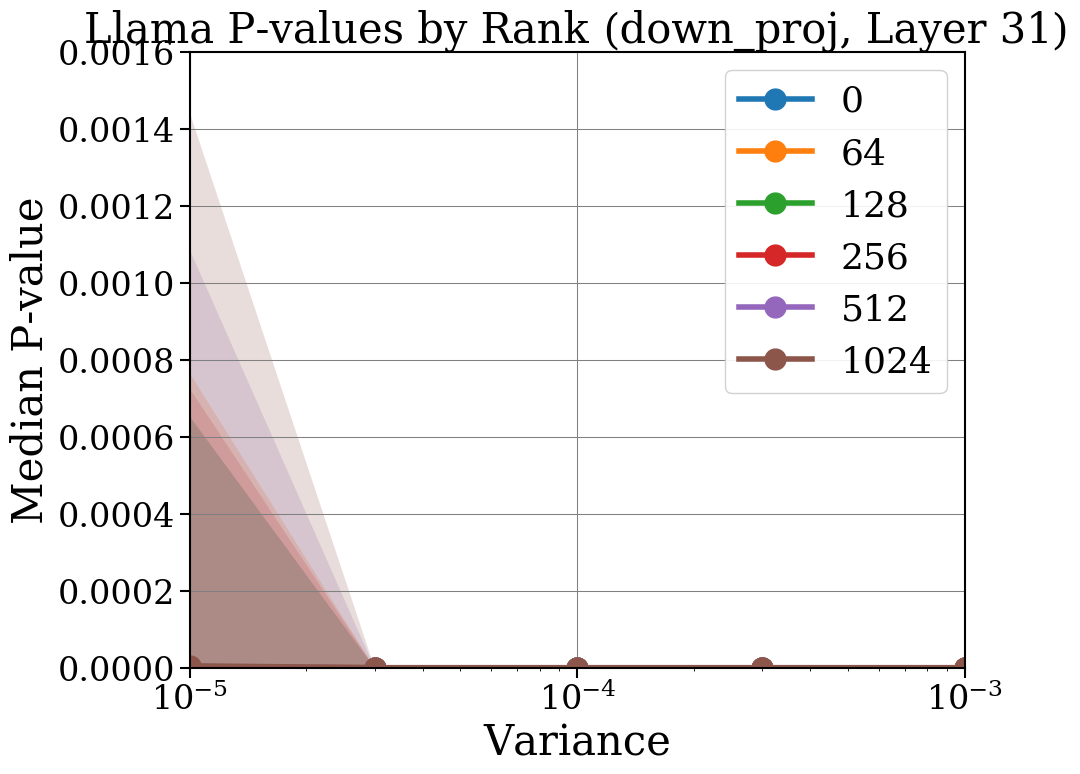

In [51]:
model = 'Llama'
mlp_type = 'down_proj'
fixed_layer = 31
title = f"{model} P-values by Rank ({mlp_type}, Layer {fixed_layer})"


fig, ax = plot_by_rank_mlptype(llama_data, mlp_type, fixed_layer, title, use_log=False)
ax.set_xlim(1e-5, 1e-3)
ax.set_ylim(0)
plt.show()

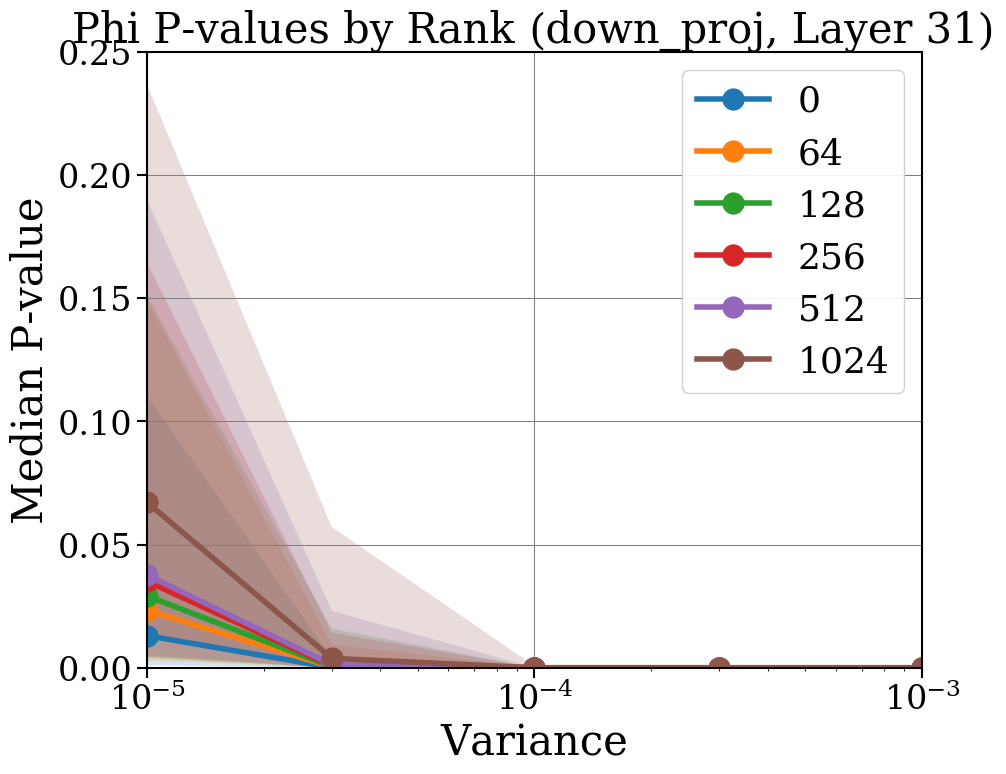

In [52]:
model = 'Phi'
mlp_type = 'down_proj'
fixed_layer = 31
# mlp_type = 'gate_up_proj'
title = f"{model} P-values by Rank ({mlp_type}, Layer {fixed_layer})"


fig, ax = plot_by_rank_mlptype(phi_data, mlp_type, fixed_layer, title, use_log=False)
ax.set_xlim(1e-5, 1e-3)
ax.set_ylim(0)
plt.show()

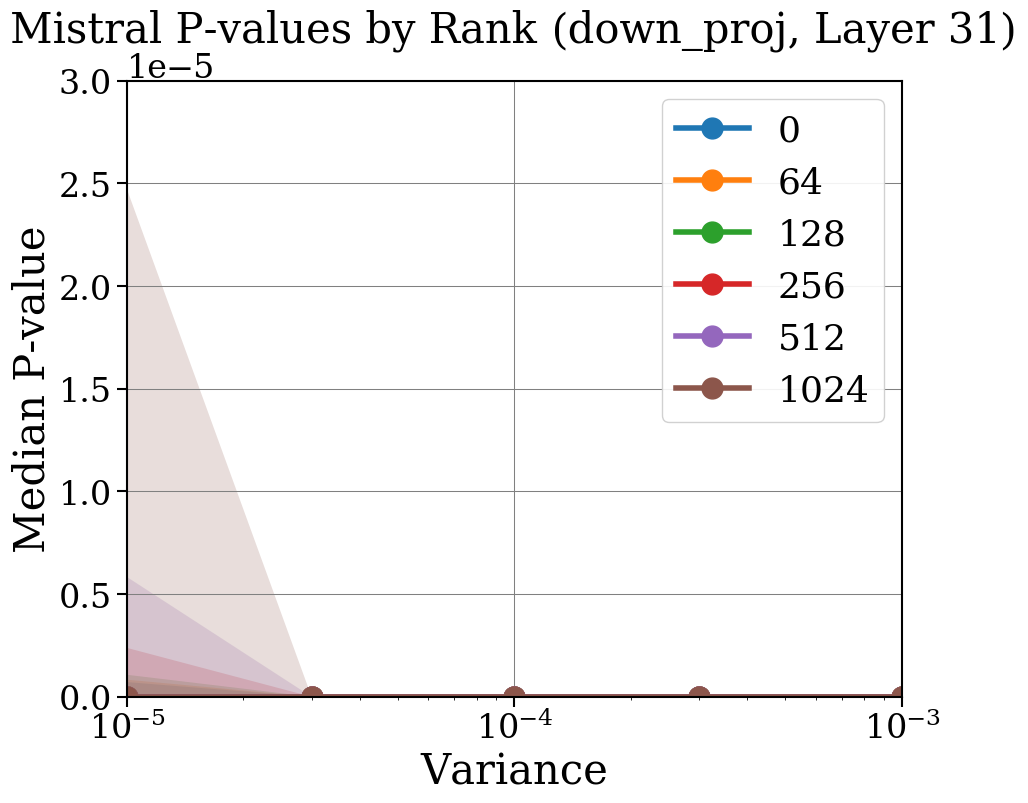

In [53]:
model = 'Mistral'
mlp_type = 'down_proj'
fixed_layer = 31
title = f"{model} P-values by Rank ({mlp_type}, Layer {fixed_layer})"


fig, ax = plot_by_rank_mlptype(mistral_data, mlp_type, fixed_layer, title, use_log=False)
ax.set_xlim(1e-5, 1e-3)
ax.set_ylim(0)
plt.show()

# Metrics by Rank

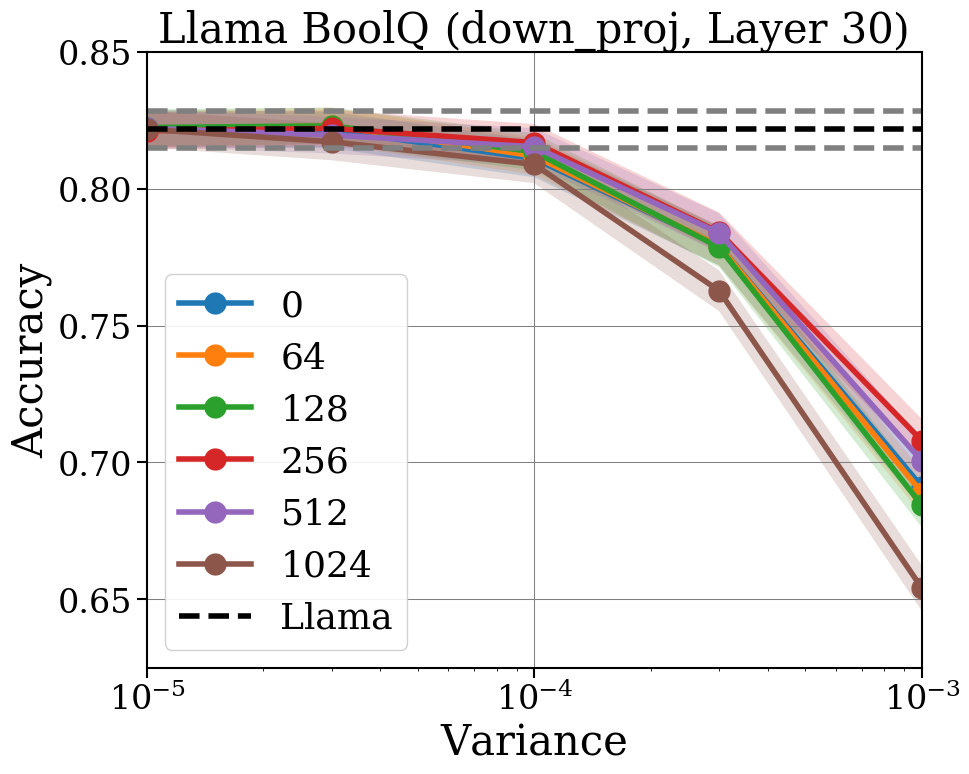

In [54]:
model = 'Llama'
mlp_type = 'down_proj'
fixed_layer = 30

task = 'boolq'
# task = 'record'
# task = 'wic'
# task = 'multirc'
# task = 'cb'
# task = 'copa'
# task = 'rte'
# task = 'wsc'
# task = 'gsm8k_cot_self_consistency'
fixed_mlp_type = 'down_proj'
if task == 'wsc':
    task_name = 'Winograd'
elif task == 'boolq':
    task_name = 'BoolQ'
elif task == 'gsm8k_cot_self_consistency':
    task_name = 'GSM8K'
else:
    task_name = task
    
title = f"{model} {task_name} ({fixed_mlp_type}, Layer {fixed_layer})"



# title = f"{model} {task_name} by Rank ({mlp_type}, Layer {fixed_layer})"
# title = f"{model} {task_name} ({mlp_type}, Layer {fixed_layer})"


fig, ax = plot_metric_by_variance_rank(llama_metrics, llama_unwatermarked, task, mlp_type, fixed_layer, title)
ax.set_xlim(1e-5, 1e-3)
# ax.set_ylim(0)

if save_figs:
    plt.savefig(os.path.join(figs_parent, f'pvalues_{model}_{task}_{mlp_type}_layer{fixed_layer}.pdf'))

plt.show()

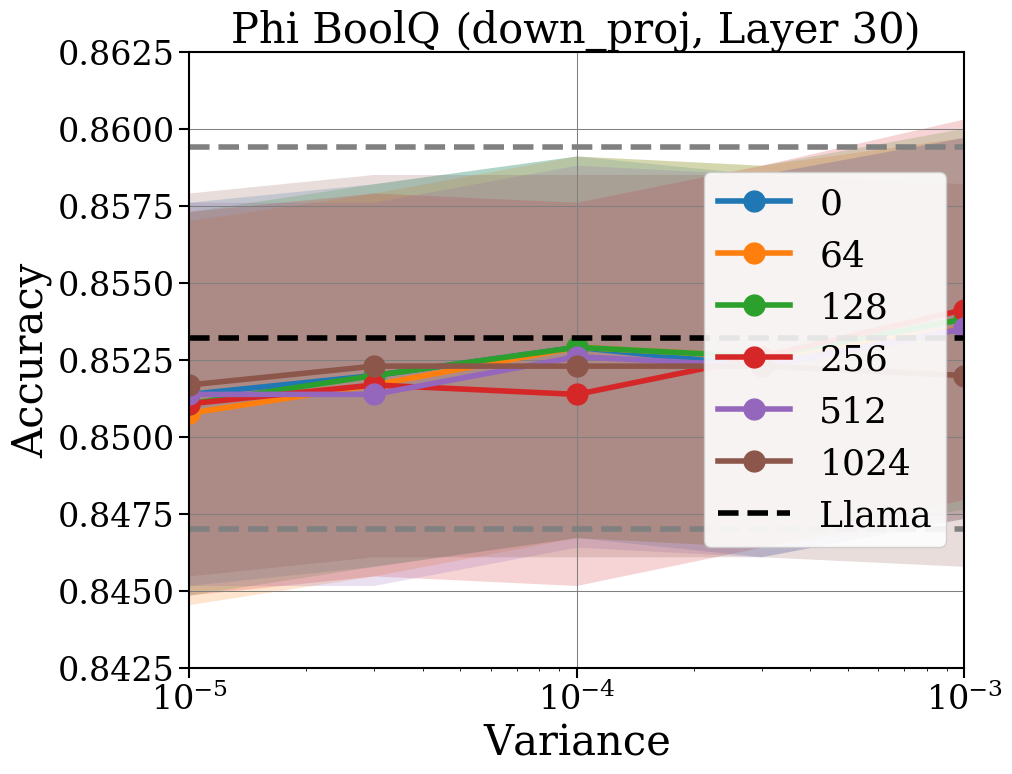

In [55]:
model = 'Phi'
mlp_type = 'down_proj'
# fixed_layer = 31


title = f"{model} {task_name} ({fixed_mlp_type}, Layer {fixed_layer})"

fig, ax = plot_metric_by_variance_rank(phi_metrics, phi_unwatermarked, task, mlp_type, fixed_layer, title)
ax.set_xlim(1e-5, 1e-3)
# ax.set_ylim(0)
if save_figs:
    plt.savefig(os.path.join(figs_parent, f'pvalues_{model}_{task}_{mlp_type}_layer{fixed_layer}.pdf'))
plt.show()

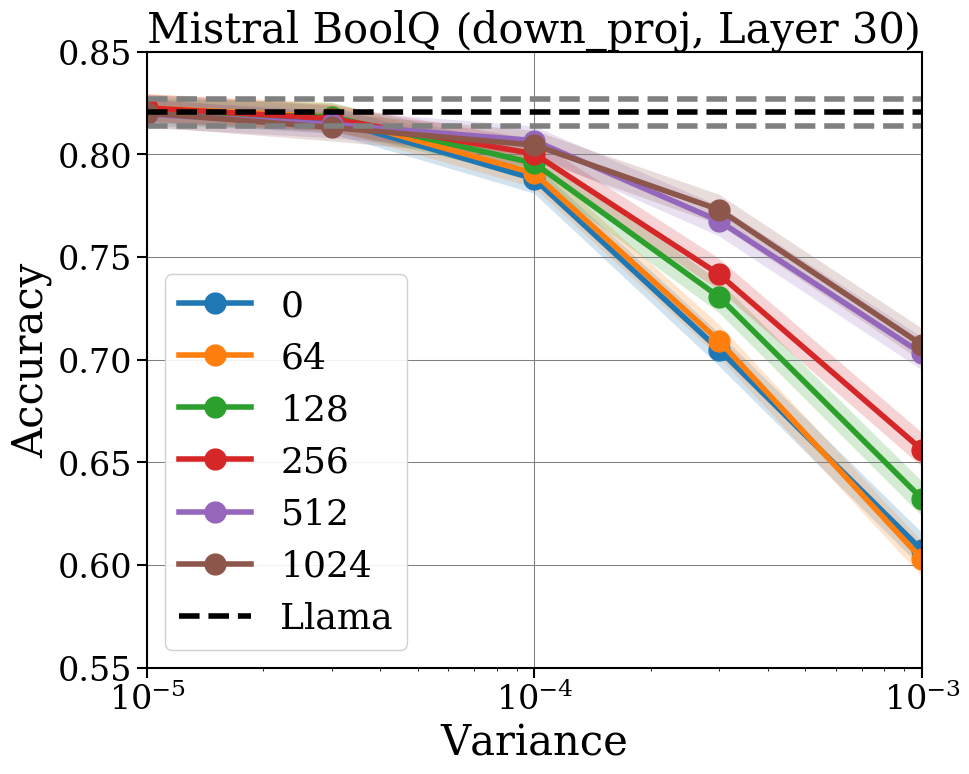

In [56]:
model = 'Mistral'
mlp_type = 'down_proj'
# fixed_layer = 31


title = f"{model} {task_name} ({fixed_mlp_type}, Layer {fixed_layer})"

fig, ax = plot_metric_by_variance_rank(mistral_metrics, mistral_unwatermarked, task, mlp_type, fixed_layer, title)
ax.set_xlim(1e-5, 1e-3)
# ax.set_ylim(0)
if save_figs:
    plt.savefig(os.path.join(figs_parent, f'pvalues_{model}_{task}_{mlp_type}_layer{fixed_layer}.pdf'))
plt.show()

# Colored Tables of median P-values

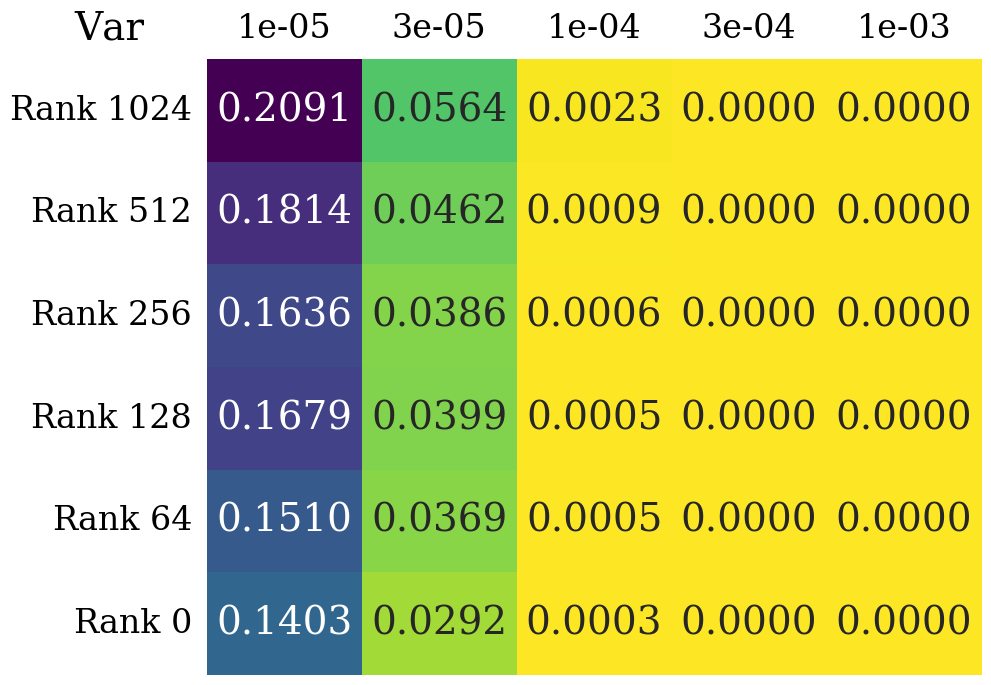

In [57]:
model = 'Llama'
fixed_mlp_type = 'down_proj'
fixed_layer  = 28
fig, ax = get_pval_colored_tables_rank(llama_data, fixed_mlp_type, fixed_layer)
title = f"{model} Median P-values ({fixed_mlp_type}, Layer {fixed_layer})"
# ax.set_title(title, y=1.12)
if save_figs:
    plt.savefig(os.path.join(figs_parent, f'pvalues_{model}_{fixed_mlp_type}_layer{fixed_layer}.pdf'))
plt.show()

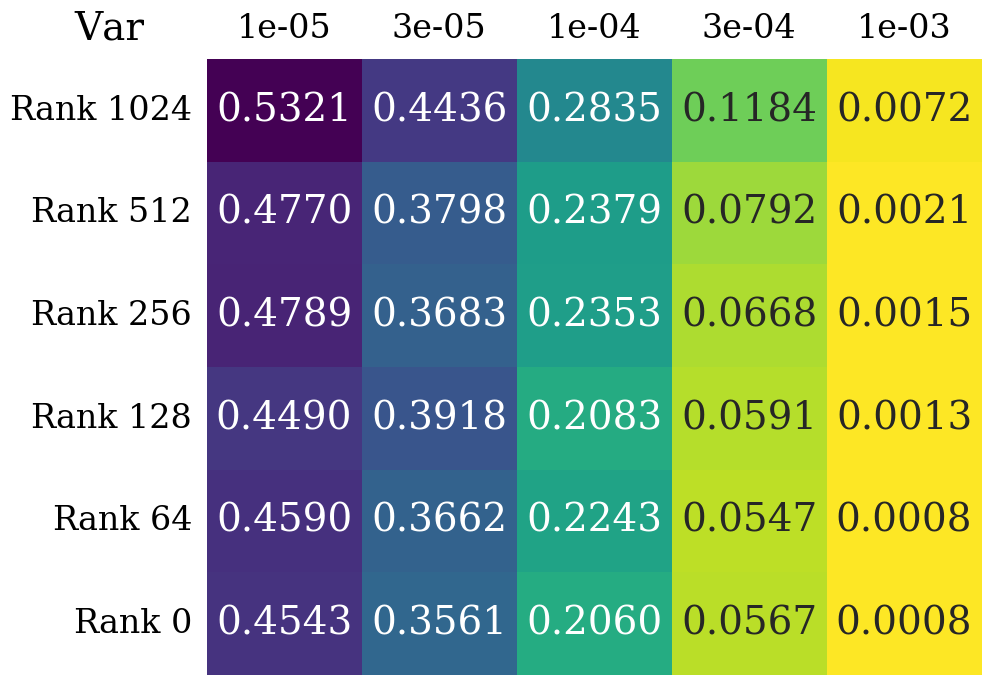

In [58]:
model = 'Phi'
fixed_mlp_type = 'down_proj'
# fixed_layer  = 31
fig, ax = get_pval_colored_tables_rank(phi_data, fixed_mlp_type, fixed_layer)
title = f"{model} Median P-values ({fixed_mlp_type}, Layer {fixed_layer})"
# ax.set_title(title, y=1.12)
if save_figs:
    plt.savefig(os.path.join(figs_parent, f'pvalues_{model}_{fixed_mlp_type}_layer{fixed_layer}.pdf'))
plt.show()

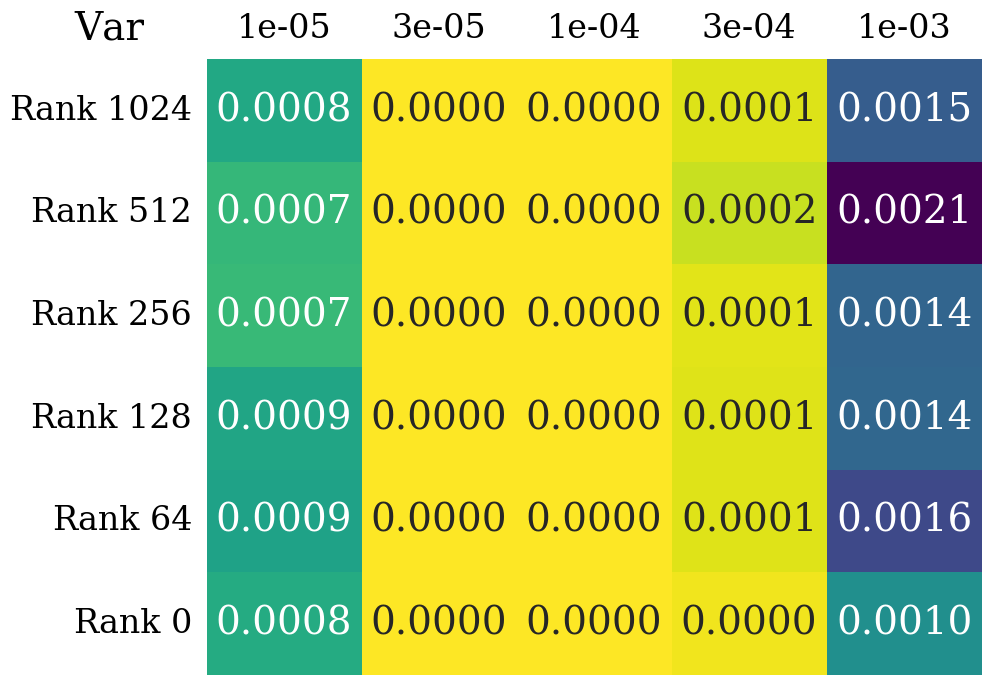

In [59]:
model = 'Mistral'
# fixed_mlp_type = 'down_proj'
fixed_mlp_type = 'gate_proj'
# fixed_layer  = 28
fig, ax = get_pval_colored_tables_rank(mistral_data, fixed_mlp_type, fixed_layer)
title = f"{model} Median P-values ({fixed_mlp_type}, Layer {fixed_layer})"
# ax.set_title(title, y=1.12)
if save_figs:
    plt.savefig(os.path.join(figs_parent, f'pvalues_{model}_{fixed_mlp_type}_layer{fixed_layer}.pdf'))
plt.show()

# Tables of Metrics

In [60]:
def get_superglue_colored_tables_rank(metrics, unwatermarked_metrics, task, fixed_mlp_type, fixed_layer, normalize=False):
    """
    Plots the colored tables of pvalues.  If normalize is True, then the scores are normalized by the unwatermarked score.  Otherwise, the raw score is used and the color is determined by whether or not the score is greater than the unwatermarked score.
    """
    mean_scores = {}
    thresholds = {}
    stderrs = {}
    threshold_stderrs = {}
    for key, metric in metrics.items():
        layer, mlp_type = get_layer_mlp_type(key[0])
        layer = int(layer)
        var = key[1]
        rank = key[2]
        if mlp_type != fixed_mlp_type:
            continue
        if layer != fixed_layer:
            continue
        
        if rank not in mean_scores.keys():
            mean_scores[rank] = {}
            thresholds[rank] = {}
            stderrs[rank] = {}
            threshold_stderrs[rank] = {}
            
        
        raw_mean = metric[task][TASKS[task]]
        threshold = unwatermarked_metrics[task][TASKS[task]] - unwatermarked_metrics[task][TASKS[task] + '_stderr']
        stderr = metric[task][TASKS[task] + '_stderr']
        threshold_stderr = unwatermarked_metrics[task][TASKS[task] + '_stderr']

        if normalize:
            mean = raw_mean / unwatermarked_metrics[task][TASKS[task]]
        else:
            mean = raw_mean

        mean_scores[rank][var] = mean
        thresholds[rank][var] = threshold
        stderrs[rank][var] = stderr
        threshold_stderrs[rank][var] = threshold_stderr

    
    for rank in mean_scores.keys():
        mean_scores[rank] = {k: v for k, v in sorted(mean_scores[rank].items(), key=lambda x: x[0])}
        thresholds[rank] = {k: v for k, v in sorted(thresholds[rank].items(), key=lambda x: x[0])}
        stderrs[rank] = {k: v for k, v in sorted(stderrs[rank].items(), key=lambda x: x[0])}
        threshold_stderrs[rank] = {k: v for k, v in sorted(threshold_stderrs[rank].items(), key=lambda x: x[0])}

    mean_scores = {k: v for k, v in sorted(mean_scores.items(), key=lambda x: x[0], reverse=True)}
    thresholds = {k: v for k, v in sorted(thresholds.items(), key=lambda x: x[0], reverse=True)}
    stderrs = {k: v for k, v in sorted(stderrs.items(), key=lambda x: x[0], reverse=True)}
    threshold_stderrs = {k: v for k, v in sorted(threshold_stderrs.items(), key=lambda x: x[0], reverse=True)}



    # array = np.zeros((len(mean_scores.keys()), len(mean_scores[next(iter(mean_scores.keys()))].keys())))
    array = np.zeros((len(mean_scores.keys()), 5))
    thresholds_array = np.zeros((len(mean_scores.keys()), 5))
    stderrs_array = np.zeros((len(mean_scores.keys()), 5))
    threshold_stderr_array = np.zeros((len(mean_scores.keys()), 5))

    for i, rank in enumerate(mean_scores.keys()):
        for j, var in enumerate(mean_scores[rank].keys()):
            array[i, j] = mean_scores[rank][var]
            thresholds_array[i, j] = thresholds[rank][var]
            stderrs_array[i, j] = stderrs[rank][var]
            threshold_stderr_array[i, j] = threshold_stderrs[rank][var]
    
    passed = np.zeros_like(array)
    passed[array + stderrs_array > thresholds_array - threshold_stderr_array] = 1
    

    fig, ax = plt.subplots()

    yticklabels = list(mean_scores.keys())
    yticklabels = [f'Rank {y}' for y in yticklabels]
    xticklabels = list(mean_scores[next(iter(mean_scores.keys()))].keys())
    xticklabels = [f'{x:.0e}' for x in xticklabels]
    if normalize:
        sns.heatmap(array, ax=ax, cmap='viridis', annot=True, fmt='.4f', cbar=False, xticklabels=xticklabels, yticklabels=yticklabels)

    else:
        cmap = plt.get_cmap('viridis')
        min_color = cmap(0.0)
        max_color = cmap(1.0)
        colors = (min_color, max_color)
        sns.heatmap(passed, ax=ax, cmap=matplotlib.colors.ListedColormap(colors), annot=array, fmt='.4f', cbar=False, xticklabels=xticklabels, yticklabels=yticklabels)
    
    # ax.tick_params(axis=u'both', which=u'both',length=0)
    # ax.set_xlabel('Var', x=-0.1)
    ax.text(-0.17,1.02, 'Var',transform=ax.transAxes, ha='left', va='bottom' )
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='x', top=False, labeltop=True, labelbottom=False, bottom=False)
    ax.tick_params(axis='y', left=False, labelleft=True, labelright=False, right=False, labelrotation=0)
    ax.grid(False)
    

    return fig, ax

Unwatermarked: 0.8423 +/- 0.0100
Unwatermarked (Normalized): (0.9881, 1.0119)


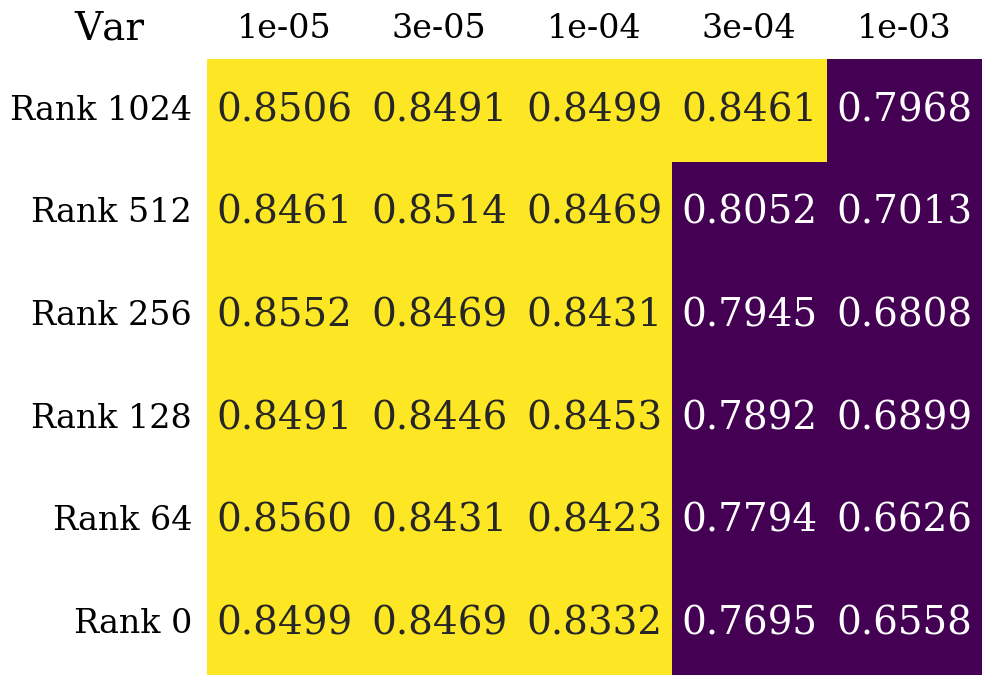

In [61]:
model = 'Phi'
fixed_mlp_type = 'down_proj'
fixed_layer  = 31



# task = 'boolq'
# task = 'record'
# task = 'wic'
# task = 'multirc'
# task = 'cb'
# task = 'copa'
# task = 'rte'
# task = 'wsc'

task  = 'gsm8k_cot_self_consistency'

if task == 'gsm8k_cot_self_consistency':
    task_name = 'GSM8K'
else:
    task_name = task.upper()

title = f"{model} {task_name} ({fixed_mlp_type}, Layer {fixed_layer})"

fig, ax = get_superglue_colored_tables_rank(phi_metrics, phi_unwatermarked, task, fixed_mlp_type, fixed_layer)
# ax.set_title(title, y=1.12)

unwat_mean = phi_unwatermarked[task][TASKS[task]]
unwat_std = phi_unwatermarked[task][TASKS[task] + '_stderr']
print(f"Unwatermarked: {unwat_mean:.4f} +/- {unwat_std:.4f}")
print(f"Unwatermarked (Normalized): ({1 - unwat_std / unwat_mean:.4f}, {1 + unwat_std / unwat_mean:.4f})")
if save_figs:
    plt.savefig(os.path.join(figs_parent, f'pvalues_{model}_{task}_{fixed_mlp_type}_layer{fixed_layer}.pdf'))
plt.show()

Unwatermarked: 0.8423 +/- 0.0100
Unwatermarked (Normalized): (0.9881, 1.0119)


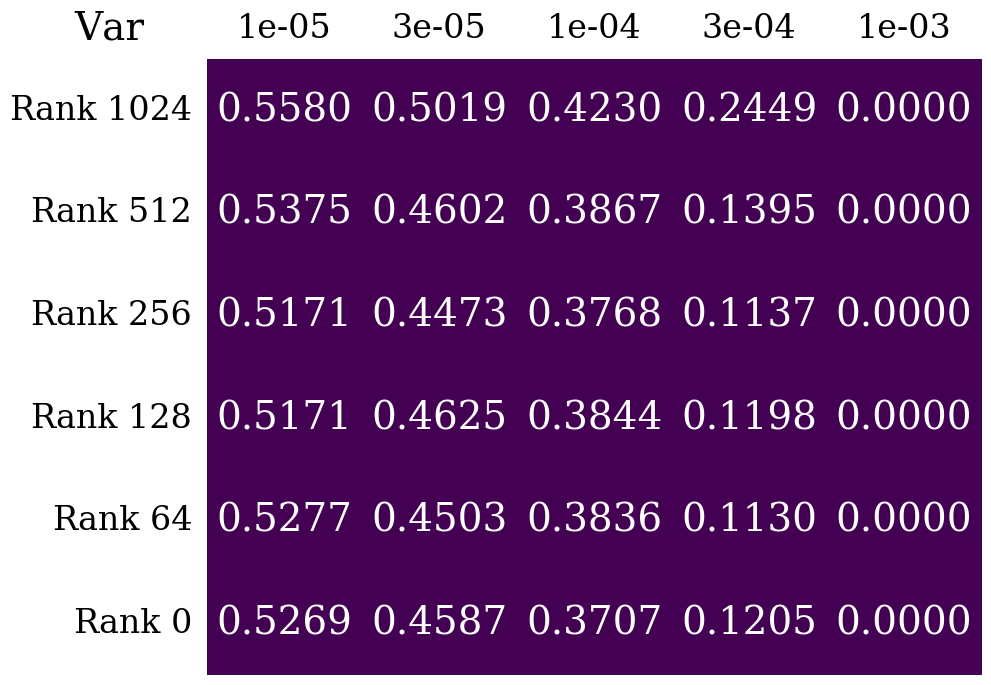

In [62]:
model = 'Llama'
fixed_mlp_type = 'down_proj'
fixed_layer  = 31

title = f"{model} {task_name} ({fixed_mlp_type}, Layer {fixed_layer})"

fig, ax = get_superglue_colored_tables_rank(llama_metrics, llama_unwatermarked, task, fixed_mlp_type, fixed_layer)
# ax.set_title(title, y=1.12)

unwat_mean = phi_unwatermarked[task][TASKS[task]]
unwat_std = phi_unwatermarked[task][TASKS[task] + '_stderr']
print(f"Unwatermarked: {unwat_mean:.4f} +/- {unwat_std:.4f}")
print(f"Unwatermarked (Normalized): ({1 - unwat_std / unwat_mean:.4f}, {1 + unwat_std / unwat_mean:.4f})")
if save_figs:
    plt.savefig(os.path.join(figs_parent, f'pvalues_{model}_{task}_{fixed_mlp_type}_layer{fixed_layer}.pdf'))
plt.show()

Unwatermarked: 0.8423 +/- 0.0100
Unwatermarked (Normalized): (0.9881, 1.0119)


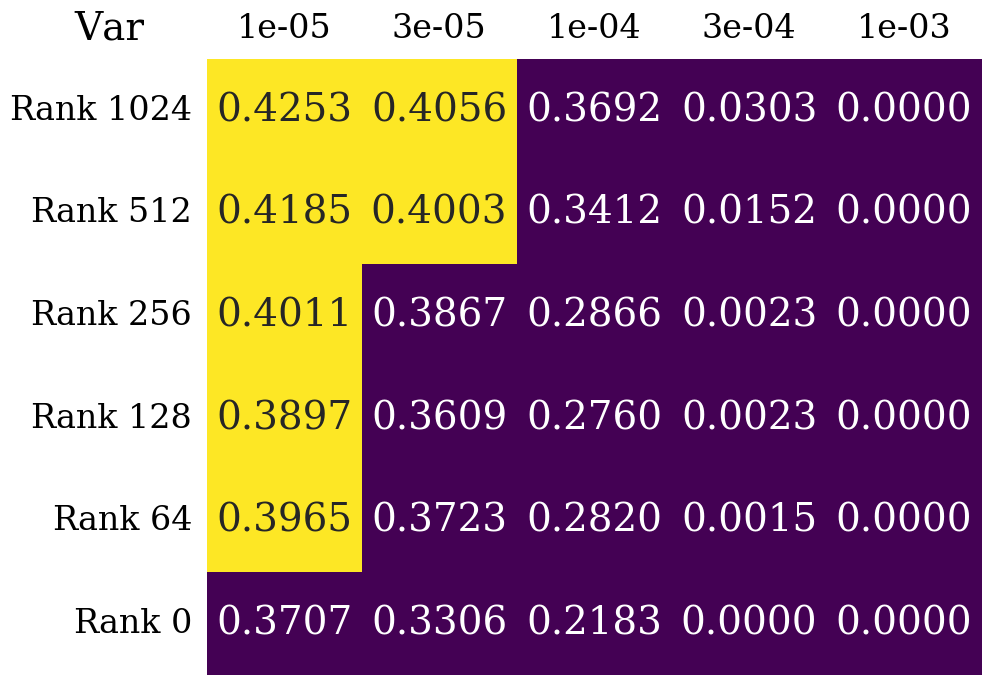

In [63]:
model = 'Mistral'
fixed_mlp_type = 'down_proj'
fixed_layer  = 31


title = f"{model} {task_name} ({fixed_mlp_type}, Layer {fixed_layer})"

fig, ax = get_superglue_colored_tables_rank(mistral_metrics, mistral_unwatermarked, task, fixed_mlp_type, fixed_layer)
# ax.set_title(title, y=1.12)

unwat_mean = phi_unwatermarked[task][TASKS[task]]
unwat_std = phi_unwatermarked[task][TASKS[task] + '_stderr']
print(f"Unwatermarked: {unwat_mean:.4f} +/- {unwat_std:.4f}")
print(f"Unwatermarked (Normalized): ({1 - unwat_std / unwat_mean:.4f}, {1 + unwat_std / unwat_mean:.4f})")
if save_figs:
    plt.savefig(os.path.join(figs_parent, f'pvalues_{model}_{task}_{fixed_mlp_type}_layer{fixed_layer}.pdf'))
plt.show()

# Getting metrics of Good models

In [64]:
good_models_lowrank = {
    'MistralLowRank': ('model.layers.30.mlp.up_proj.weight', 1e-05, 1024), # ('model.layers.30.mlp.gate_proj.weight', 1e-05, 512),
    'LlamaLowRank': ('model.layers.29.mlp.down_proj.weight', 0.0001, 512), # ('model.layers.31.mlp.up_proj.weight', 3e-05, 1024), # 
    'PhiLowRank': ('model.layers.31.mlp.gate_up_proj.weight', 0.0003, 1024)  #
}
task_names ={
    'boolq': 'BoolQ',
    'cb': 'CB',
    'copa': 'COPA',
    'multirc': 'MultiRC',
    'record': 'ReCoRD',
    'rte': 'RTE',
    'wic': 'WiC',
    'wsc': 'Winograd'
}
task_metrics = {
    'boolq': 'acc',
    'cb': 'acc',
    'copa': 'acc',
    'multirc': 'acc',
    'record': 'f1',
    'rte': 'acc',
    'wic': 'acc',
    'wsc': 'acc'
}

In [65]:
table_str = "\\toprule \\textbf{Task} & \\textbf{Llama (LowRank)} & \\textbf{Llama (Unwatermarked)} \\\\ \n"

metric_dict = llama_metrics
param = good_models_lowrank['LlamaLowRank']
metric_dict = metric_dict[param]
unwatermarked_metrics = llama_unwatermarked



for task in task_names.keys():
    task_name = task_names[task]
    metric = task_metrics[task]
    mean = metric_dict[task][metric]
    std = metric_dict[task][metric + '_stderr']
    unwat_mean = unwatermarked_metrics[task][metric]
    unwat_std = unwatermarked_metrics[task][metric + '_stderr']
    temp_str = "\\textbf{" + task_name + "} & " + f"{mean:.4f} $\\pm$ {std:.4f} & {unwat_mean:.4f} $\\pm$ {unwat_std:.4f} \\\\ \n"
    table_str += temp_str

table_str += "\\bottomrule"


print(table_str)

\toprule \textbf{Task} & \textbf{Llama (LowRank)} & \textbf{Llama (Unwatermarked)} \\ 
\textbf{BoolQ} & 0.8205 $\pm$ 0.0067 & 0.8217 $\pm$ 0.0067 \\ 
\textbf{CB} & 0.5893 $\pm$ 0.0663 & 0.6250 $\pm$ 0.0653 \\ 
\textbf{COPA} & 0.8700 $\pm$ 0.0338 & 0.8700 $\pm$ 0.0338 \\ 
\textbf{MultiRC} & 0.5720 $\pm$ 0.0071 & 0.5720 $\pm$ 0.0071 \\ 
\textbf{ReCoRD} & 0.9221 $\pm$ 0.0026 & 0.9222 $\pm$ 0.0026 \\ 
\textbf{RTE} & 0.7076 $\pm$ 0.0274 & 0.7040 $\pm$ 0.0275 \\ 
\textbf{WiC} & 0.5063 $\pm$ 0.0198 & 0.5157 $\pm$ 0.0198 \\ 
\textbf{Winograd} & 0.6058 $\pm$ 0.0482 & 0.5865 $\pm$ 0.0485 \\ 
\bottomrule


In [66]:
table_str = "\\toprule \\textbf{Task} & \\textbf{Mistral (LowRank)} & \\textbf{Mistral (Unwatermarked)} \\\\ \n"

metric_dict = mistral_metrics
param = good_models_lowrank['MistralLowRank']
metric_dict = metric_dict[param]
unwatermarked_metrics = mistral_unwatermarked



for task in task_names.keys():
    task_name = task_names[task]
    metric = task_metrics[task]
    mean = metric_dict[task][metric]
    std = metric_dict[task][metric + '_stderr']
    unwat_mean = unwatermarked_metrics[task][metric]
    unwat_std = unwatermarked_metrics[task][metric + '_stderr']
    temp_str = "\\textbf{" + task_name + "} & " + f"{mean:.4f} $\\pm$ {std:.4f} & {unwat_mean:.4f} $\\pm$ {unwat_std:.4f} \\\\ \n"
    table_str += temp_str

table_str += "\\bottomrule"
print(table_str)

\toprule \textbf{Task} & \textbf{Mistral (LowRank)} & \textbf{Mistral (Unwatermarked)} \\ 
\textbf{BoolQ} & 0.8199 $\pm$ 0.0067 & 0.8205 $\pm$ 0.0067 \\ 
\textbf{CB} & 0.4821 $\pm$ 0.0674 & 0.5357 $\pm$ 0.0672 \\ 
\textbf{COPA} & 0.9200 $\pm$ 0.0273 & 0.9200 $\pm$ 0.0273 \\ 
\textbf{MultiRC} & 0.5693 $\pm$ 0.0071 & 0.5672 $\pm$ 0.0071 \\ 
\textbf{ReCoRD} & 0.9198 $\pm$ 0.0027 & 0.9219 $\pm$ 0.0026 \\ 
\textbf{RTE} & 0.6570 $\pm$ 0.0286 & 0.6823 $\pm$ 0.0280 \\ 
\textbf{WiC} & 0.5690 $\pm$ 0.0196 & 0.5674 $\pm$ 0.0196 \\ 
\textbf{Winograd} & 0.5000 $\pm$ 0.0493 & 0.4615 $\pm$ 0.0491 \\ 
\bottomrule


In [67]:
table_str = "\\toprule \\textbf{Task} & \\textbf{Phi (LowRank)} & \\textbf{Phi (Unwatermarked)} \\\\ \n"

metric_dict = phi_metrics
param = good_models_lowrank['PhiLowRank']
metric_dict = metric_dict[param]
unwatermarked_metrics = phi_unwatermarked



for task in task_names.keys():
    task_name = task_names[task]
    metric = task_metrics[task]
    mean = metric_dict[task][metric]
    std = metric_dict[task][metric + '_stderr']
    unwat_mean = unwatermarked_metrics[task][metric]
    unwat_std = unwatermarked_metrics[task][metric + '_stderr']
    temp_str = "\\textbf{" + task_name + "} & " + f"{mean:.4f} $\\pm$ {std:.4f} & {unwat_mean:.4f} $\\pm$ {unwat_std:.4f} \\\\ \n"
    table_str += temp_str

table_str += "\\bottomrule"
print(table_str)

\toprule \textbf{Task} & \textbf{Phi (LowRank)} & \textbf{Phi (Unwatermarked)} \\ 
\textbf{BoolQ} & 0.8502 $\pm$ 0.0062 & 0.8532 $\pm$ 0.0062 \\ 
\textbf{CB} & 0.0893 $\pm$ 0.0385 & 0.0893 $\pm$ 0.0385 \\ 
\textbf{COPA} & 0.8700 $\pm$ 0.0338 & 0.8700 $\pm$ 0.0338 \\ 
\textbf{MultiRC} & 0.3195 $\pm$ 0.0067 & 0.3296 $\pm$ 0.0068 \\ 
\textbf{ReCoRD} & 0.8705 $\pm$ 0.0033 & 0.8725 $\pm$ 0.0033 \\ 
\textbf{RTE} & 0.7545 $\pm$ 0.0259 & 0.7509 $\pm$ 0.0260 \\ 
\textbf{WiC} & 0.5549 $\pm$ 0.0197 & 0.5752 $\pm$ 0.0196 \\ 
\textbf{Winograd} & 0.7981 $\pm$ 0.0396 & 0.8269 $\pm$ 0.0373 \\ 
\bottomrule


# Scratch

In [68]:
import json

In [69]:
with open('amlt/10-10-watermark-phi-lowrank/grid_10-10-watermark-phi-lowrank_lay_30_mlp_down_proj_mod_microsoft_Phi-3-mini-4k-instruct_ran_1024_var_3e-5/generations.json', 'r') as f:    
    gens = json.load(f)

In [70]:
gens[0].keys()

dict_keys(['prompt', 'prompt_token_ids', 'response', 'response_token_ids', 'logprobs', 'pvalue', 'score', 'var_under_null', 'base_model_logprobs', 'passed'])

In [71]:
print(gens[0]['prompt']) 
print("Response:")
print(gens[0]['response'])


    <|system|>
    You are a helpful assistant.<|end|>
    <|user|>
    Complete the following prompt:<|end|>
    <|assistant|>

    After the martyrdom of St. Boniface, Vergilius was made Bishop of Salzburg (766 or 767) and laboured
Response:
 for the spread of Christianity and the Latin language in Germany. He supported missionary work among the Slavic peoples and was instrumental in their conversion to Christianity, a movement that marked a significant step in the history of the Church's expansion. His efforts are commemorated in his name, Boniface, and in the city of St. Boniface in Germany.

Boniface's commitment to his faith and the spread of Christianity through the use of the Latin language left an enduring impact on Germany and the wider world. His dedication has shaped Christian thought and practice and remains an example of the tireless work and sacrifice of many individuals throughout history in pursuit of their faith and mission.


In [72]:
with open('./generations.json', 'r') as f:
    base_gens = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './generations.json'

In [ ]:
print(base_gens[0]['prompt']) 
print("Response:")
print(base_gens[0]['response'])


    <|system|>
    You are a helpful assistant.<|end|>
    <|user|>
    Complete the following prompt:<|end|>
    <|assistant|>

    After the martyrdom of St. Boniface, Vergilius was made Bishop of Salzburg (766 or 767) and laboured
Response:
 for Christianization of the Austrasia region. Vergilius' death took place in Salzburg, about 784. Vergilius was a Gallican bishop from Ratisbon, who became a missionary at the invitation of Pepin of Herstal, Mayor of the Palace of Austrasia. He is known for founding numerous churches and cathedrals, and for his efforts to educate the local population in religious doctrine. His dedication to his work and his unwavering faith earned him the title of "Apostle of the Austrasia region". Despite the challenges of spreading Christianity in a predominantly pagan region, Vergilius' legacy lives on in the many historical and architectural sites that he helped establish.
